### Classification of Letters by Ada Boost Classifier

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import zero_one_loss
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

#### Read letterCG data file

In [13]:
df = pd.read_csv('letterCG.bin',delimiter=' ')
df.head(3)

,Class,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,C,4,10,5,8,2,5,7,7,10,7,6,13,1,8,4,9
1,C,3,5,4,4,2,4,8,5,7,12,9,11,1,10,2,7
2,G,5,10,6,7,3,8,7,8,8,6,7,9,2,7,5,10


In [14]:
df_x = df.iloc[:,1:-1]
df_x

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege
0,4,10,5,8,2,5,7,7,10,7,6,13,1,8,4
1,3,5,4,4,2,4,8,5,7,12,9,11,1,10,2
2,5,10,6,7,3,8,7,8,8,6,7,9,2,7,5
3,5,9,6,7,4,3,8,6,7,12,10,13,1,9,3
4,4,8,5,6,3,6,6,7,6,10,7,12,2,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,5,10,6,8,4,5,8,9,9,9,9,12,2,10,4
1505,6,11,7,8,4,6,7,10,9,10,7,11,2,12,4
1506,5,9,6,7,4,6,7,6,6,10,7,10,2,9,5
1507,6,11,7,8,5,5,8,7,6,8,8,15,4,9,6


In [15]:
df_y = df.iloc[:,0]
df_y

0       C
1       C
2       G
3       C
4       G
       ..
1504    C
1505    C
1506    G
1507    C
1508    C
Name: Class, Length: 1509, dtype: object

#### Split train test data

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3)

In [18]:
n_estimators = 16
learning_rate = 1.

####  AdaBoostClassifier with max_depth as 1

In [20]:
dt_stump1 = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)
dt_stump1.fit(X_train, y_train)
dt_stump_err1 = 1.0 - dt_stump.score(X_test, y_test)

dt1 = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)
dt1.fit(X_train, y_train)
dt_err1 = 1.0 - dt.score(X_test, y_test)

In [21]:
ada_real_1 = AdaBoostClassifier(
    base_estimator=dt_stump,
    learning_rate=learning_rate,
    n_estimators=n_estimators,
    algorithm="SAMME.R")
ada_real_1.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=16)

####  AdaBoostClassifier with max_depth as 2

In [22]:
dt_stump2 = DecisionTreeClassifier(max_depth=2, min_samples_leaf=1)
dt_stump2.fit(X_train, y_train)
dt_stump_err2 = 1.0 - dt_stump.score(X_test, y_test)

dt2 = DecisionTreeClassifier(max_depth=2, min_samples_leaf=1)
dt2.fit(X_train, y_train)
dt_err2 = 1.0 - dt.score(X_test, y_test)

In [23]:
ada_real_2 = AdaBoostClassifier(
    base_estimator=dt_stump2,
    learning_rate=learning_rate,
    n_estimators=n_estimators,
    algorithm="SAMME.R")
ada_real_2.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   n_estimators=16)

 #### Plot error vs estimators

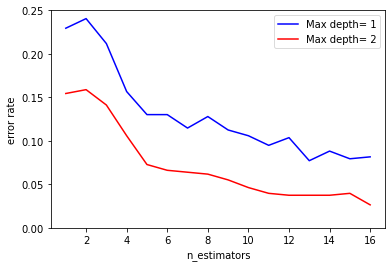

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)

ada_real_err_1 = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_real_1.staged_predict(X_test)):
    ada_real_err_1[i] = zero_one_loss(y_pred, y_test)
    
ada_real_err_2 = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_real_2.staged_predict(X_test)):
    ada_real_err_2[i] = zero_one_loss(y_pred, y_test)
    
ax.plot(np.arange(n_estimators) + 1, ada_real_err_1,
    label='Max depth= 1',
    color='blue')    

ax.plot(np.arange(n_estimators) + 1, ada_real_err_2,
    label='Max depth= 2',
    color='red')

ax.set_ylim((0.0, 0.25))
ax.set_xlabel('n_estimators')
ax.set_ylabel('error rate')

leg = ax.legend(loc='upper right', fancybox=True)
leg.get_frame().set_alpha(0.7)

plt.show()